# Trabalho Fase - Emanuel Staub Araldi

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

import DSP

# Atraso de Sistema Atraso Ideal

$$
h[n]  = \delta[n-n_0]    \\~\\
H(z)  = z^{-n_0}         \\~\\
H(hw) = e^{-j\omega n_0} \\~\\
y[n]  = x[n-n_0]         \\~\\
group\_delay = -\dfrac{d}{d\omega}\angle H(j\omega) = -\dfrac{d}{d\omega} -\omega n_0 \\~\\
group\_delay = n_0 \\~\\
$$

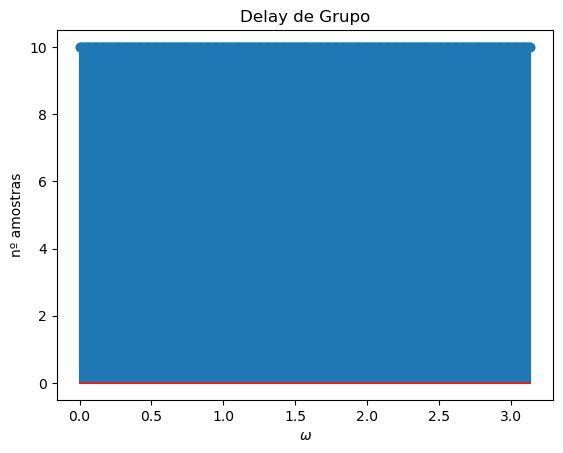

In [2]:
# Atraso de um Sistema Ideal
n0 = 10
b = np.zeros(n0+1)  # Corrige off by one
b[-1] = 1           # x[n-n0]
a = [1]             # y[n]
# Grupo de Atraso de um Sistema Ideal
w, gd = sp.signal.group_delay((b, a))
DSP.plot([gd, w], title="Delay de Grupo", xl = "$\omega$", yl= "nº amostras")

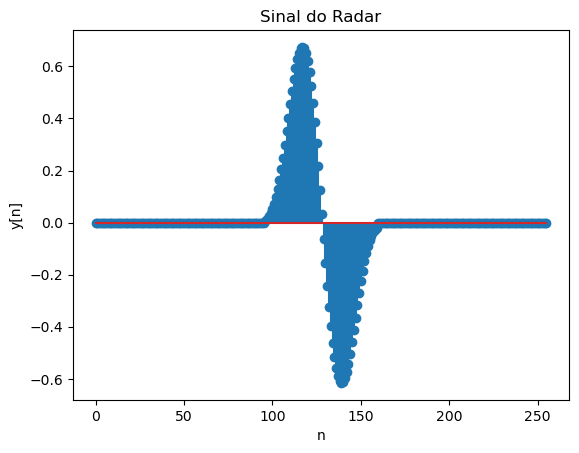

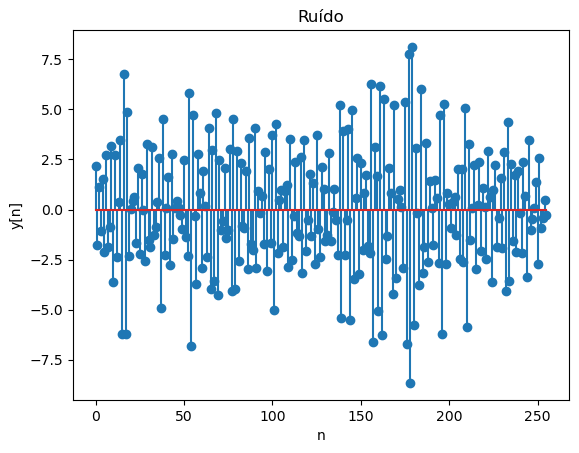

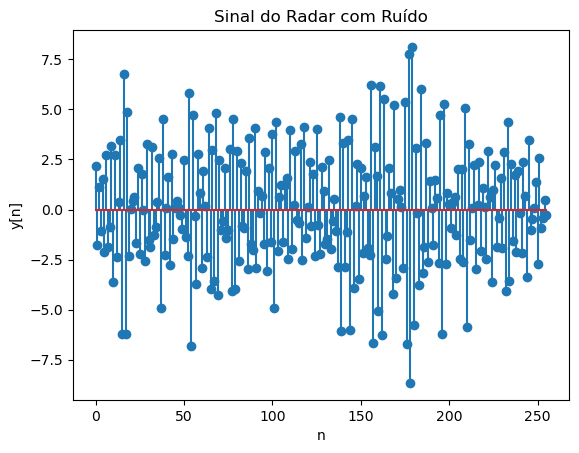

In [3]:
mat_vars = sp.io.loadmat("Sinais/gdeldata.mat")
x1 = mat_vars["x1"][0]
n = np.arange(0, len(x1))
DSP.plot([x1, n], title="Sinal do Radar")
noise = mat_vars["noise"][0]
DSP.plot([noise, n], title="Ruído")
x1_noisy = x1 + noise
DSP.plot([x1_noisy, n], title="Sinal do Radar com Ruído")

Podemos ver que o ruído é muito maior que o sinal desejado, mas também podemos ver que o sinal é bem comportado e provavelmente restrito à uma faixa de frequência estreita, descontando o janelamento. Podemos então analisar o espectro de frequência do sinal e do ruído separadamente e em conjunto.

<Figure size 640x480 with 0 Axes>

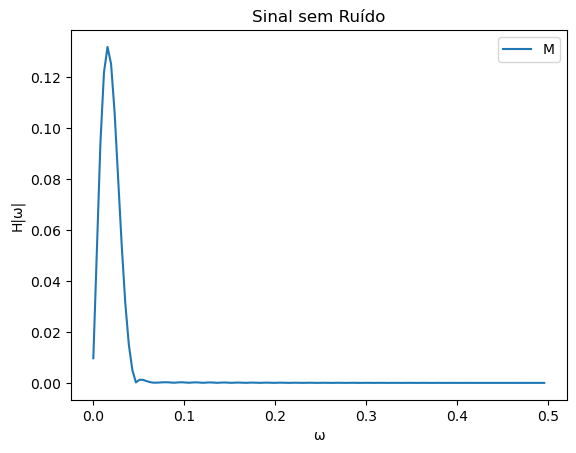

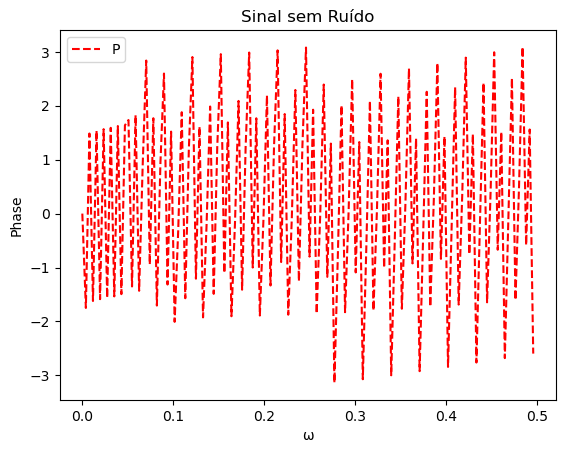

<Figure size 640x480 with 0 Axes>

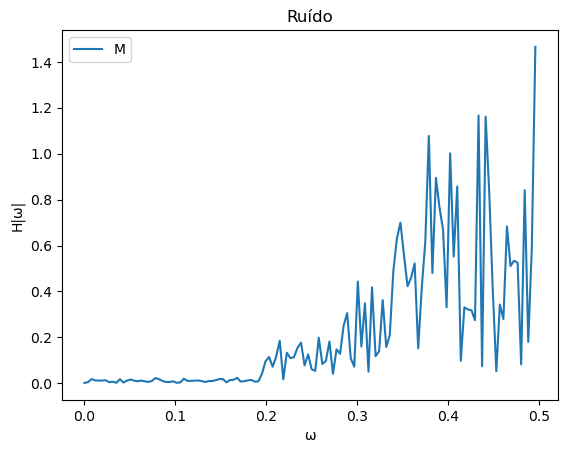

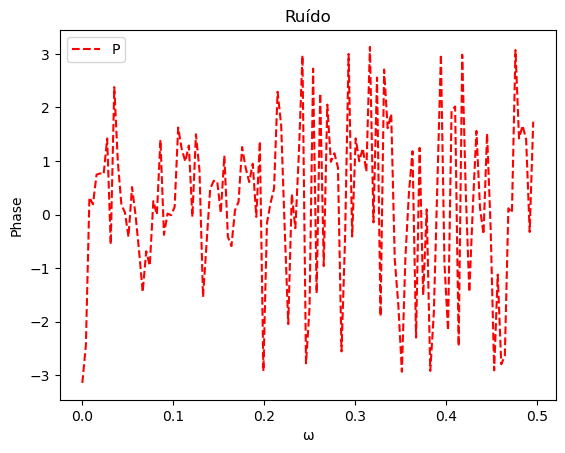

<Figure size 640x480 with 0 Axes>

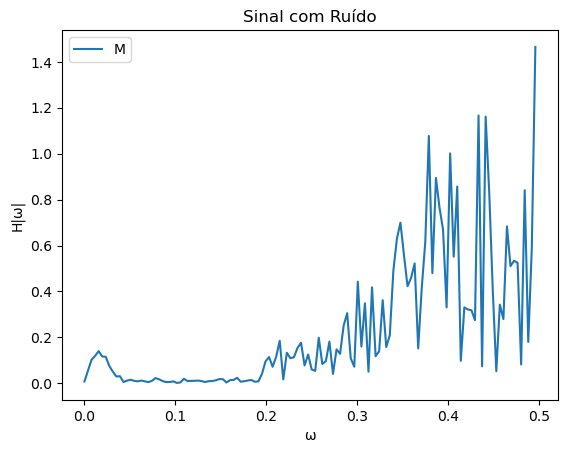

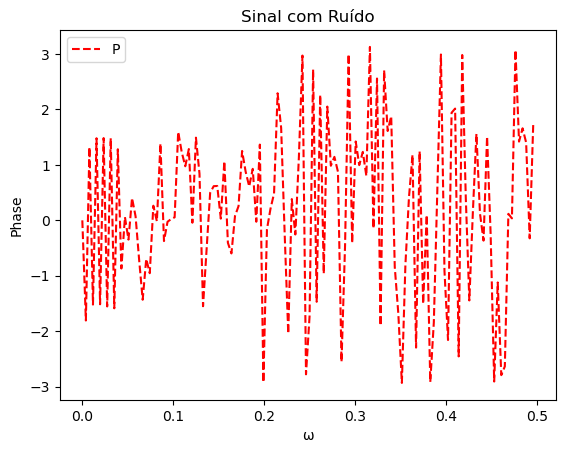

In [4]:
DSP.plot_FFT(x1, "Separate", title="Sinal sem Ruído")
DSP.plot_FFT(noise, "Separate", title="Ruído")
DSP.plot_FFT(x1_noisy, "Separate", title="Sinal com Ruído")

Mesmo sem separar o sinal original do ruído, como o ruído possui magnitude muito maior que o sinal , podemos reconhecer o sinal na frequência por seu pequeno pico em ~0.01 rad/s

Podemos então filtrar o sinal com um simples filtro passa-baixa com $\omega_c \approx 0.05$, como o ruído possui uma frequência muito maior que o sinal original, o filtro não necessita de uma ordem alta, podendo ser até mesmo de ordem 1, mas por segurança será usado um filtro buttersworth de ordem 2 além do filtro do arquivo matlab

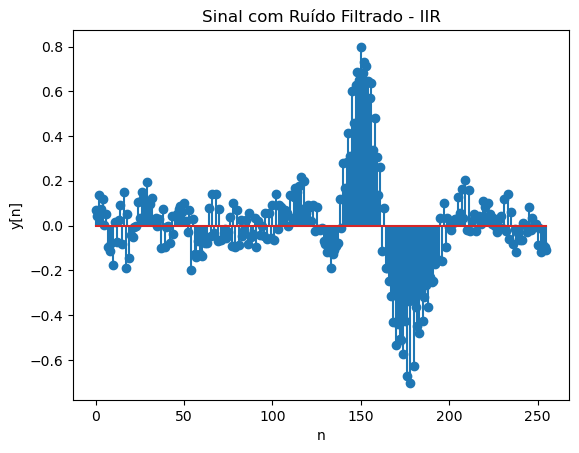

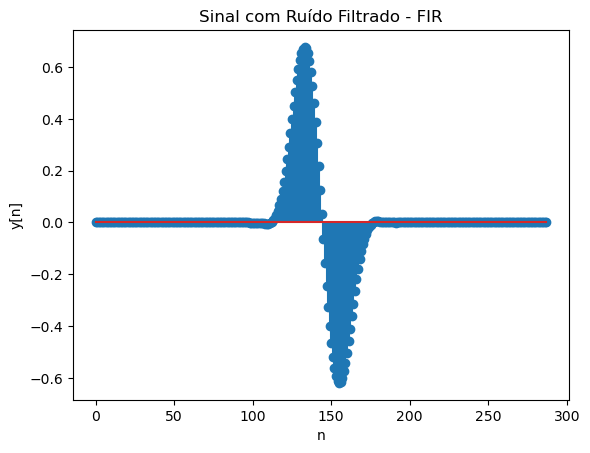

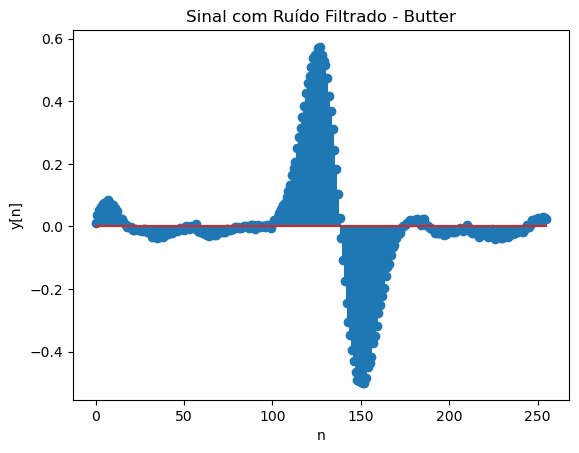

In [5]:
# Implementando o filtro
b, a = mat_vars["b"][0], mat_vars["a"][0]
bb, ab = sp.signal.butter(2, 0.05) # => Filtro projetado para comparação
x1_filtrado = sp.signal.lfilter(b, a, x1_noisy)
x1_butter = sp.signal.lfilter(bb, ab, x1_noisy) # Achei o filtro dado muito ruim
h_FIR = mat_vars["h"][0]
[x1_FIR, n_FIR] = DSP.conv_m(h_FIR, n, x1, n)
DSP.plot([x1_filtrado, n], title="Sinal com Ruído Filtrado - IIR")
DSP.plot([x1_FIR, n_FIR], title="Sinal com Ruído Filtrado - FIR")
DSP.plot([x1_butter, n], title="Sinal com Ruído Filtrado - Butter")

Podemos ver que o filtro IIR não foi bem projetado para o sinal, segue uma representação em H(z) e em equação de diferenças dos filtros IIR e FIR

-----------------
Filtro IIR
       0.032 + -0.166z^-1 + 0.412z^-2 + -0.659z^-3 + 0.768z^-4 + -0.676z^-5 + 0.436z^-6 + -0.184z^-7 + 0.037z^-8
H(z) = ---------------------------------------------------------------------------------------------------------
       1.0 + -6.615z^-1 + 19.587z^-2 + -33.9z^-3 + 37.503z^-4 + -27.146z^-5 + 12.55z^-6 + -3.387z^-7 + 0.409z^-8

1.0*y[n] + -6.615*y[n-1] + 19.587*y[n-2] + -33.9*y[n-3] + 37.503*y[n-4] + -27.146*y[n-5] + 12.55*y[n-6] + -3.387*y[n-7] + 0.409*y[n-8]  =  0.032*x[n] + -0.166*x[n-1] + 0.412*x[n-2] + -0.659*x[n-3] + 0.768*x[n-4] + -0.676*x[n-5] + 0.436*x[n-6] + -0.184*x[n-7] + 0.037*x[n-8]

-----------------
Filtro FIR
       0.005 + -0.012z^-1 + -0.013z^-2 + -0.01z^-3 + -0.0z^-4 + 0.013z^-5 + 0.022z^-6 + 0.019z^-7 + 0.0z^-8 + -0.027z^-9 + -0.047z^-10 + -0.041z^-11 + -0.0z^-12 + 0.073z^-13 + 0.157z^-14 + 0.224z^-15 + 0.25z^-16 + 0.224z^-17 + 0.157z^-18 + 0.073z^-19 + -0.0z^-20 + -0.041z^-21 + -0.047z^-22 + -0.027z^-23 + 0.0z^-24 + 0.019z^-2

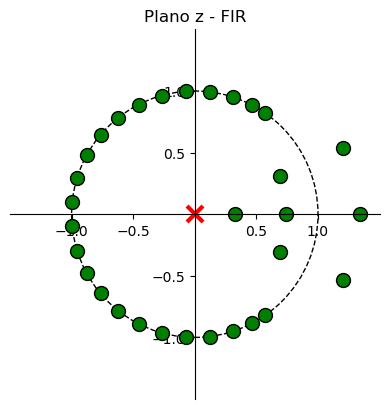

(array([ 3.06103636+0.j        ,  1.34392877+0.j        ,
         1.20024878+0.53405375j,  1.20024878-0.53405375j,
        -0.99501959+0.09967961j, -0.99501959-0.09967961j,
        -0.95547071+0.29508596j, -0.95547071-0.29508596j,
        -0.87796517+0.47872451j, -0.87796517-0.47872451j,
        -0.76537047+0.64358997j, -0.76537047-0.64358997j,
        -0.62255973+0.78257228j, -0.62255973-0.78257228j,
        -0.45521567+0.89038121j, -0.45521567-0.89038121j,
        -0.27012155+0.96282623j, -0.27012155-0.96282623j,
        -0.0751142 +0.99717494j, -0.0751142 -0.99717494j,
         0.12045388+0.99271892j,  0.12045388-0.99271892j,
         0.30606927+0.95200925j,  0.30606927-0.95200925j,
         0.4665766 +0.88448079j,  0.4665766 -0.88448079j,
         0.57214026+0.82015579j,  0.57214026-0.82015579j,
         0.69546961+0.30945097j,  0.69546961-0.30945097j,
         0.74408705+0.j        ,  0.32668674+0.j        ]),
 array([0.]),
 1.0)

In [6]:
print("-----------------")
print("Filtro IIR")
DSP.print_Hz_diff_eq(b, a, Separate=False)
b_FIR = h_FIR
a_FIR = [1, 0]
print("-----------------")
print("Filtro FIR")
DSP.print_Hz(b_FIR, a_FIR)
print("-----------------")
DSP.zplane(b_FIR, a_FIR, title="Plano z - FIR")

Analisando os efeitos do filtro em frequência, obtemos:

<Figure size 640x480 with 0 Axes>

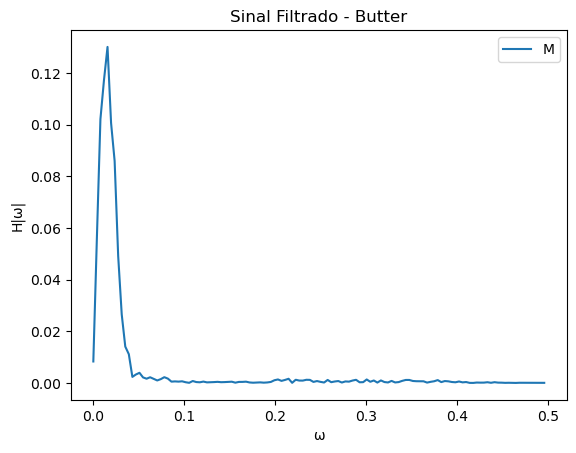

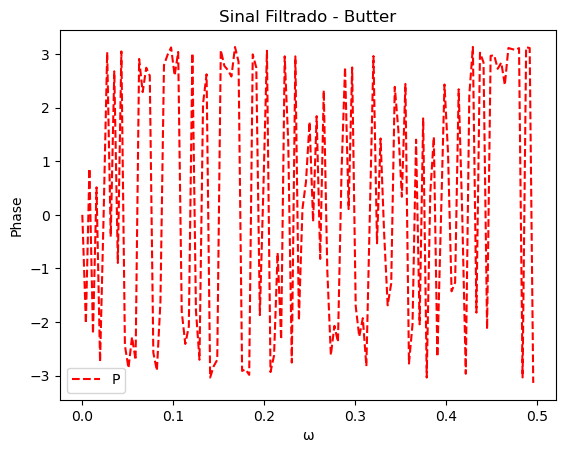

In [20]:
DSP.plot_FFT(x1_butter, "Separate", title="Sinal Filtrado - Butter")

Como demonstrado, é possível projetar um filtro para isolar o sinal

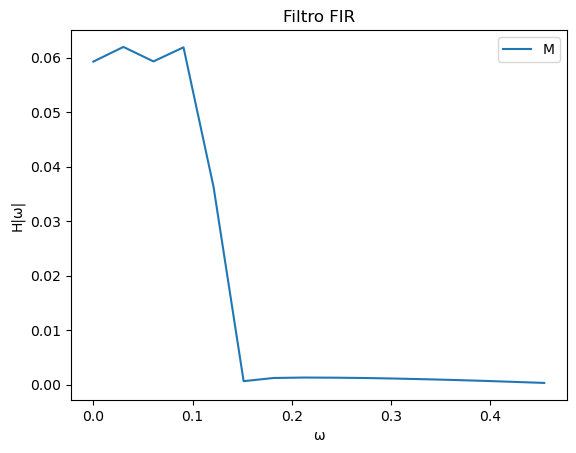

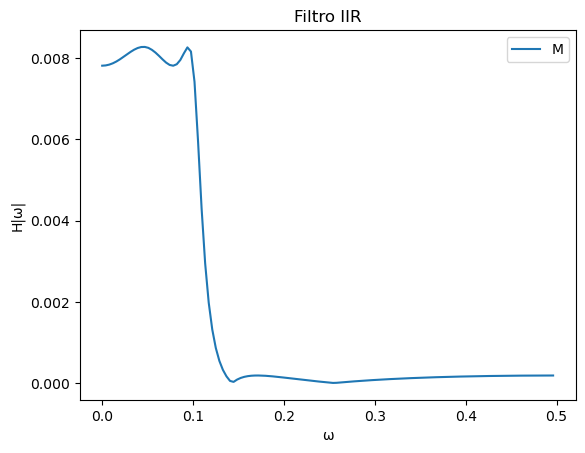

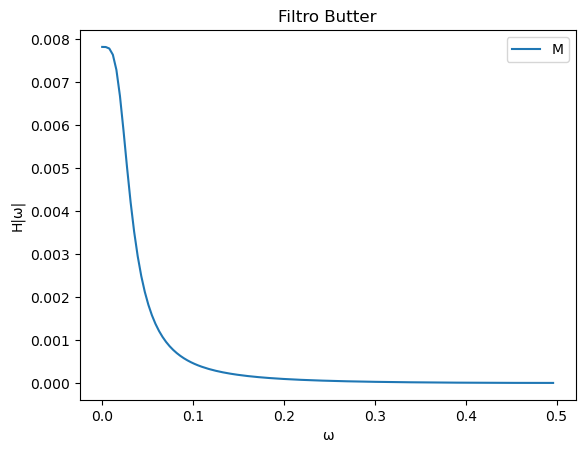

In [8]:
# Resposta em magnitude dos dois filtros
DSP.plot_FFT(h_FIR, title="Filtro FIR")
x = np.zeros(len(n))
x[0] = 1
h_IIR = sp.signal.lfilter(b, a, x)
DSP.plot_FFT(h_IIR, title="Filtro IIR")
h_butter = sp.signal.lfilter(bb, ab, x)
DSP.plot_FFT(h_butter, title="Filtro Butter")

Text(0.5, 1.0, 'Resposta em Magnitude dos Filtros Matlab')

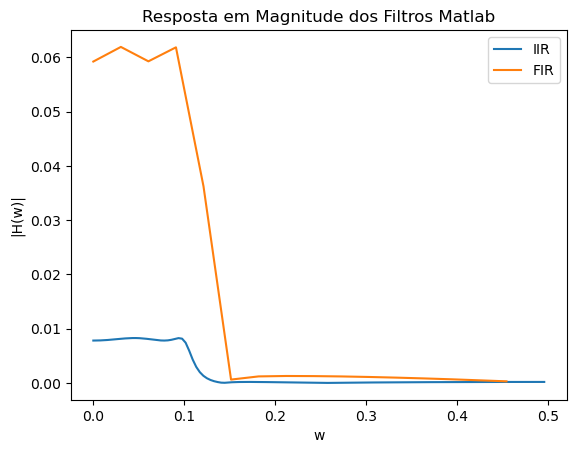

In [9]:
# Sobrepondo Filtros IIR e FIR
F_IIR = DSP.get_FFT(h_IIR)
F_FIR = DSP.get_FFT(h_FIR)
#IIR#
fig = plt.figure()
# First plot
ax = fig.add_subplot(1, 1, 1)
# Titles and labels
ax.set_xlabel('w')
ax.set_ylabel('|H(w)|')
ax.plot(F_IIR[1], np.abs(F_IIR[0]), label="IIR")
#FIR#
ax.plot(F_FIR[1], np.abs(F_FIR[0]), label="FIR")
ax.legend("FIR")
ax.legend()
plt.title("Resposta em Magnitude dos Filtros Matlab")

Podemos ver que todos os filtros encontram o sinal dentro de sua região de "passa" e o ruído dentro de sua região "rejeita", mas podemos ver um "ruído" oscilatório dentro da região "passa" que reduz a fidelidade do sinal filtrado, conforme visto anteriormente. O efeito do "ruído" dentro dessa região é melhor visualizado ao comparar com a resposta do filtro butter

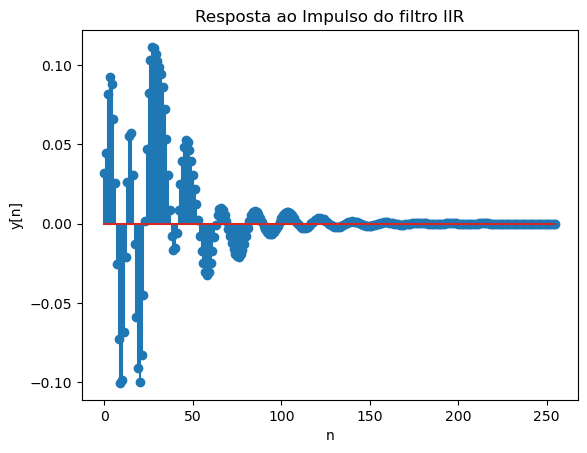

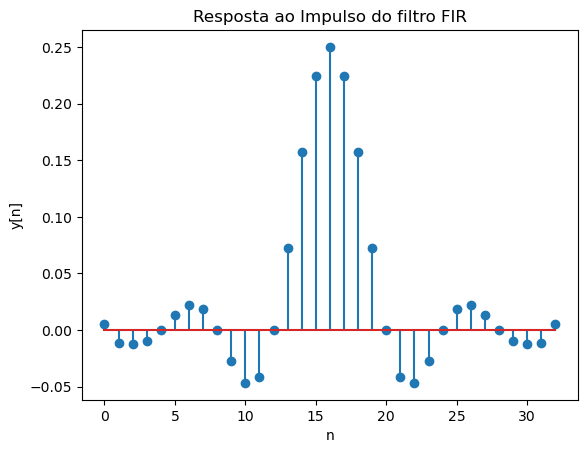

In [18]:
# Resposta do filtro IIR ao impulso
x = np.zeros(len(n))
x[0] = 1
hI = sp.signal.lfilter(b, a, x)
DSP.plot([hI, n], title="Resposta ao Impulso do filtro IIR")
# Resposta do filtro FIR ao impulso
hF = mat_vars["h"][0]
nF = np.arange(0, len(hF))
DSP.plot([hF, nF], title="Resposta ao Impulso do filtro FIR")

Podemos ver que a resposta do filtro FIR é simétrica, isto quer dizer que possui fase linear em frequência, o que resulta em um grupo de atraso constante e fase proporcional a frequência

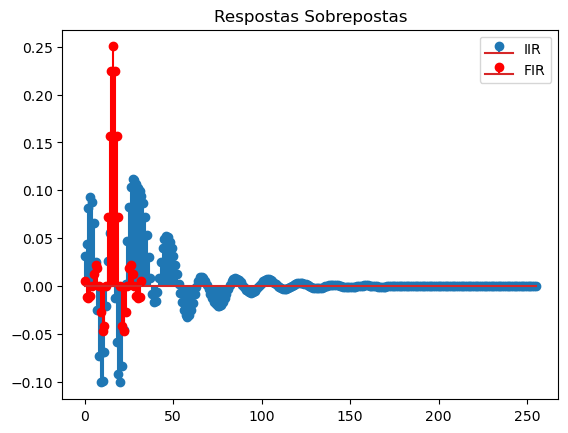

In [19]:
# Respostas sobrepostas
fig = plt.subplot(1, 1, 1)
plt.stem(n, hI, label = "IIR")
plt.stem(nF, hF, 'r-', label = "FIR")
plt.title("Respostas Sobrepostas")
plt.legend()
plt.show()

Para o atraso de grupo do filtro IIR:

$$
H(z) = \dfrac{0.032 + -0.166z^{-1} + 0.412z^{-2} + -0.659z^{-3} + 0.768z^{-4} + -0.676z^{-5} + 0.436z^{-6} + -0.184z^{-7} + 0.037z^{-8}}{1.0 + -6.615z^{-1} + 19.587z^{-2} + -33.9z^{-3} + 37.503z^{-4} + -27.146z^{-5} + 12.55z^{-6} + -3.387z^{-7} + 0.409z^{-8}} \\~\\
\angle H(z) = \angle H_1(z)-\angle H_2(z) \\~\\

\angle H_1(z) = \angle (0.032 + -0.166z^{-1} + 0.412z^{-2} + -0.659z^{-3} + 0.768z^{-4} + -0.676z^{-5} + 0.436z^{-6} + -0.184z^{-7} + 0.037z^{-8}) \\~\\

\angle H_2(z) = \angle (1.0 + -6.615z^{-1} + 19.587z^{-2} + -33.9z^{-3} + 37.503z^{-4} + -27.146z^{-5} + 12.55z^{-6} + -3.387z^{-7} + 0.409z^{-8}) \\~\\
$$

O resultado é extremamente longo e pode ser encontrado dentro do arquivo "delay_de_grupo_filtro_IIR" feito no Maxima

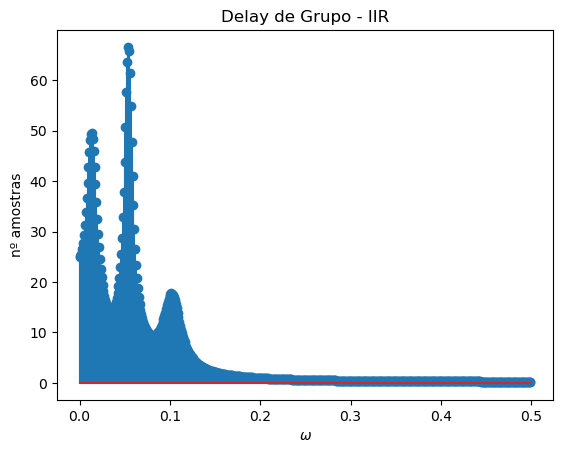

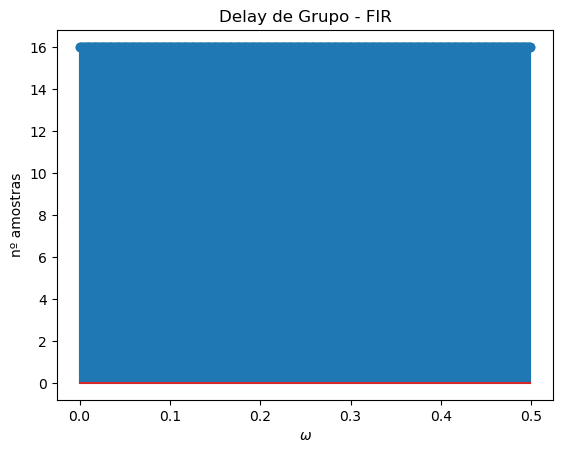

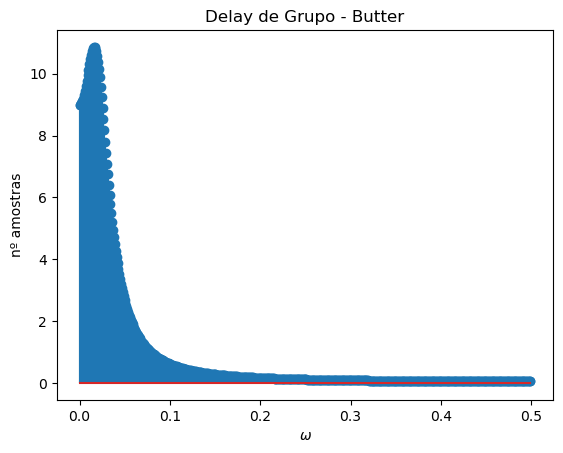

In [11]:
## Cálculo do delay de grupo
DSP.plot_group_delay(b, a, title="Delay de Grupo - IIR")
## FIR
DSP.plot_group_delay(b_FIR, a_FIR, title="Delay de Grupo - FIR")
# Comparando com butter
DSP.plot_group_delay(bb, ab, title="Delay de Grupo - Butter")

<Figure size 640x480 with 0 Axes>

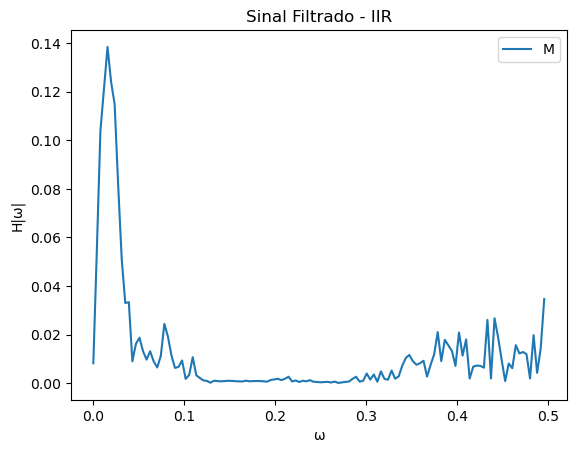

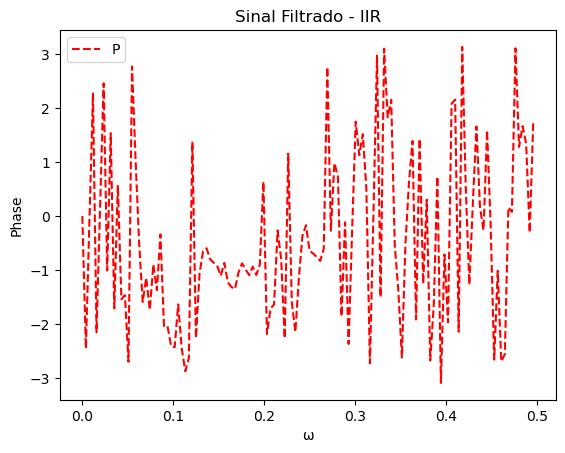

<Figure size 640x480 with 0 Axes>

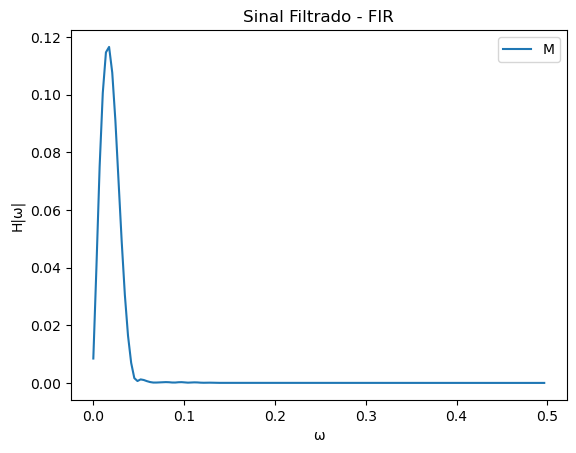

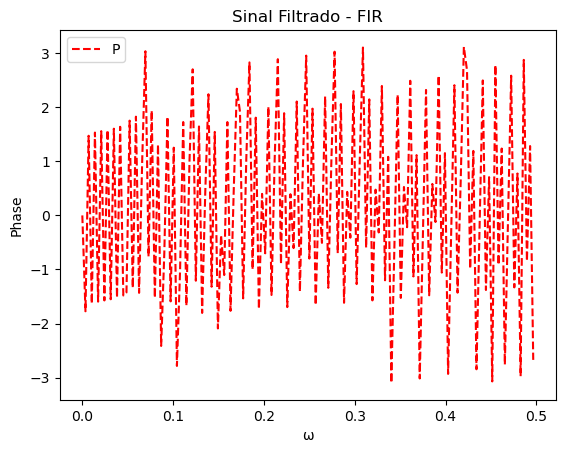

In [21]:
DSP.plot_FFT(x1_filtrado, "Separate", title="Sinal Filtrado - IIR")
DSP.plot_FFT(x1_FIR, "Separate", title="Sinal Filtrado - FIR")

Podemos ver que dentre os filtros, o filtro IIR é o que possui mais ruído em seu espectro e é o que mais distorce a fase do sinal; o filtro FIR possui o espectro mais "limpo" e quase não altera a fase do sinal original, o que é esperado dada sua resposta ao impulso, como será comentado adiante.

# Distorção de Pulso

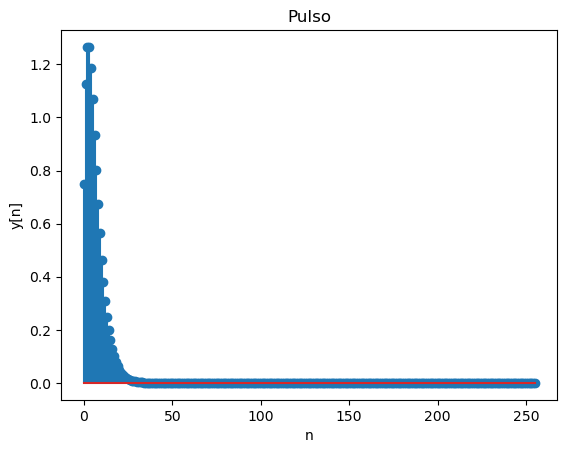

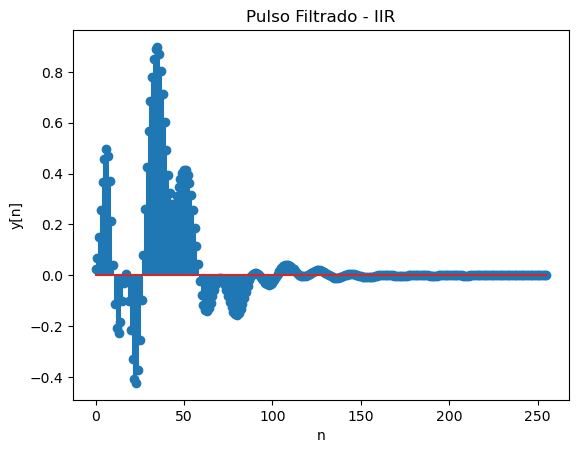

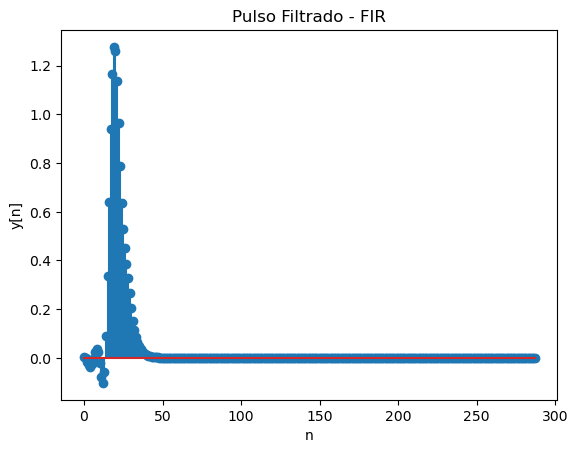

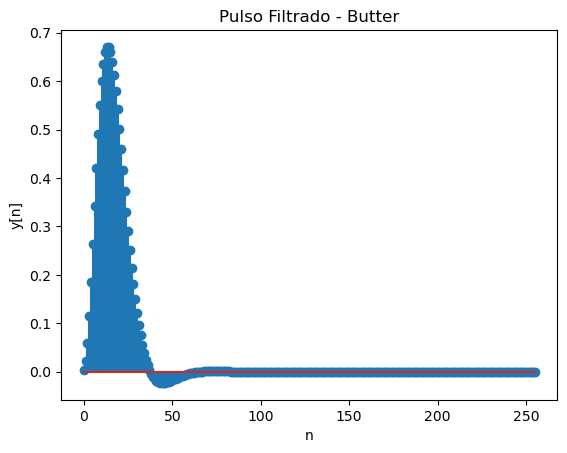

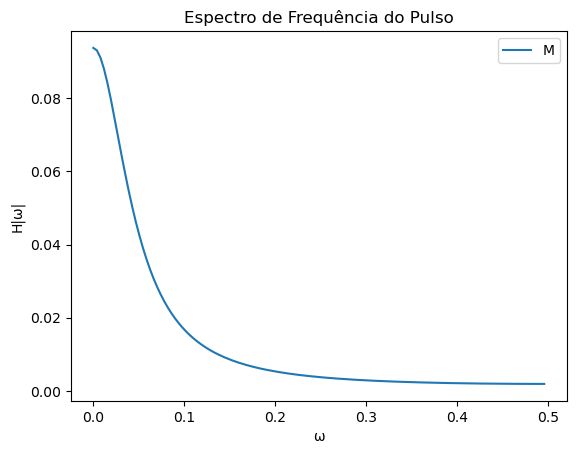

In [12]:
pulse = mat_vars["pulse"][0]
pulse_IIR = sp.signal.lfilter(b, a, pulse)
[pulse_FIR, nF] = DSP.conv_m(pulse, n, hF, n)
pulse_butter = sp.signal.lfilter(bb, ab, pulse)
# Plotando
DSP.plot([pulse, n], title="Pulso")
DSP.plot([pulse_IIR, n], title="Pulso Filtrado - IIR")
DSP.plot([pulse_FIR, nF], title="Pulso Filtrado - FIR")
DSP.plot([pulse_butter, n], title="Pulso Filtrado - Butter")
DSP.plot_FFT(pulse, title="Espectro de Frequência do Pulso")

Se compararmos o espectro de frequência do pulso com o atraso de grupo do filtro IIR, a resposta se torna evidente. A maioria dos componentes do pulso estão em uma região onde o delay de grupo é extremamente inconsistente, resultando em um espalhamento no domínio do tempo

# Pulso com Ruído

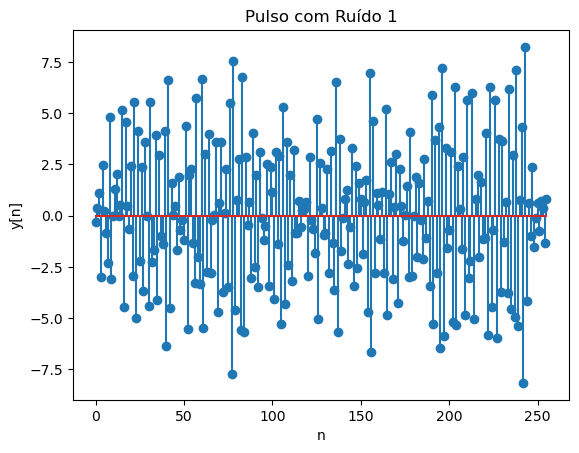

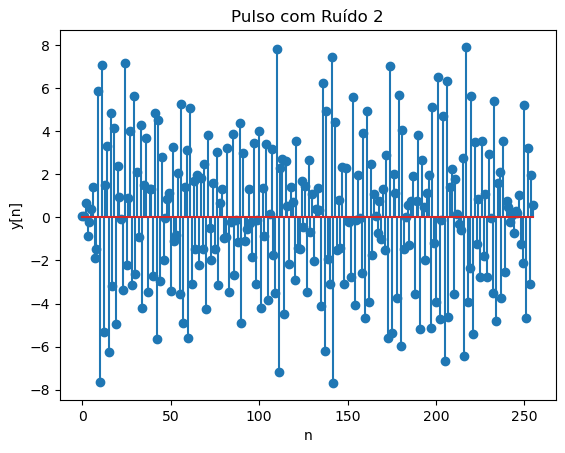

In [13]:
# Explorando Sinal
pnd_1 = mat_vars["pnd_1"][0]
pnd_2 = mat_vars["pnd_2"][0]
n = np.arange(0, len(pnd_1))
##
DSP.plot([pnd_1, n], title="Pulso com Ruído 1")
DSP.plot([pnd_2, n], title="Pulso com Ruído 2")

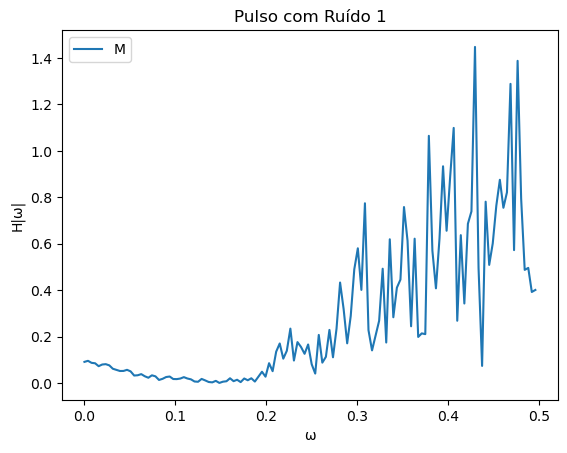

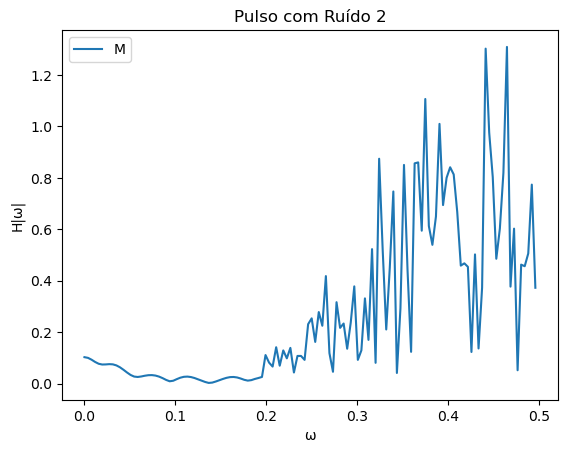

In [14]:
# Frequência do Ruído
DSP.plot_FFT(pnd_1, title="Pulso com Ruído 1")
DSP.plot_FFT(pnd_2, title="Pulso com Ruído 2")

Podemos ver o mesmo tipo de ruído presente no sinal de antes

In [15]:
# Delay de grupo
pnd_1_IIR = sp.signal.lfilter(b, a, pnd_1)
[pnd_1_FIR, nF] = DSP.conv_m(pnd_1, n, h_FIR, n)
pnd_1_butter = sp.signal.lfilter(bb, ab, pnd_1)
#
pnd_2_IIR = sp.signal.lfilter(b, a, pnd_2)
[pnd_2_FIR, nF] = DSP.conv_m(pnd_2, n, h_FIR, n)
pnd_2_butter = sp.signal.lfilter(bb, ab, pnd_2)

------------------------------------
Pico sem aplicação de filtro:  [2 3]
Pico com aplicação de filtro FIR:  [31]
Atraso:  [29 28] amostras
------------------------------------
Vale sem aplicação de filtro:  [255]
Vale com aplicação de filtro FIR:  [214]
Atraso:  [-41] amostras
------------------------------------


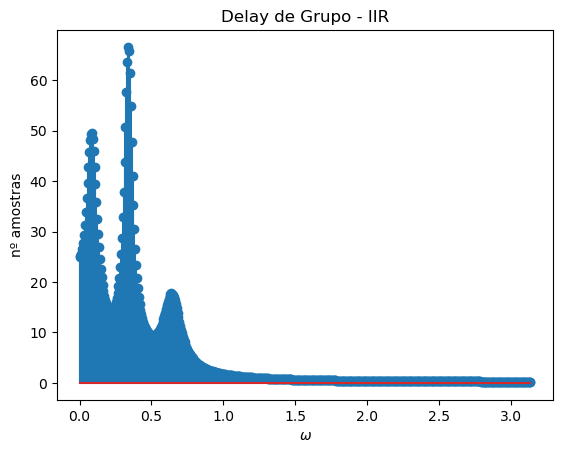

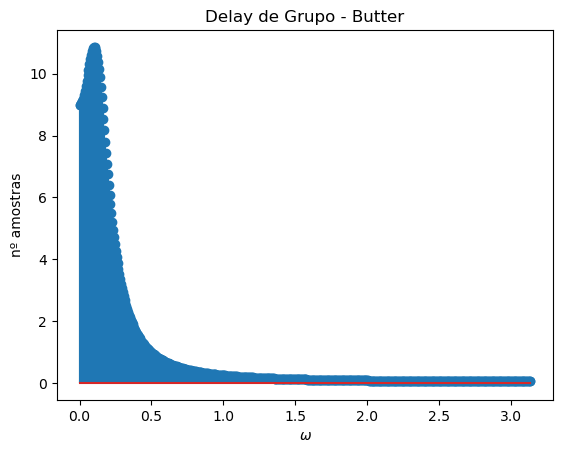

In [16]:
# Local dos picos
no = n[pulse == np.max(pulse)] # Pico do sinal original
nf = nF[pnd_1_FIR == np.max(pnd_1_FIR)] # Pico do sinal filtrado
print("------------------------------------")
print("Pico sem aplicação de filtro: ", no)
print("Pico com aplicação de filtro FIR: ", nf)
print("Atraso: ", nf-no, "amostras")

#
print("------------------------------------")
#

# Local dos vales - Como todo o pulso > 0 e apenas o pulso filtrado possui um ponto < 0, não é confiável
nov = n[pulse == np.min(pulse)] # Vale do sinal original
nfv = nF[pnd_1_FIR == np.min(pnd_1_FIR)] # Pico do sinal filtrado

print("Vale sem aplicação de filtro: ", nov)
print("Vale com aplicação de filtro FIR: ", nfv)
print("Atraso: ", nfv-nov, "amostras")
print("------------------------------------")
## Cálculo do delay de grupo
w, gd = sp.signal.group_delay((b, a))
DSP.plot([gd, w], title="Delay de Grupo - IIR", xl = "$\omega$", yl= "nº amostras")
# Comparando com butter
wb, gdb = sp.signal.group_delay((bb, ab))
DSP.plot([gdb, wb], title="Delay de Grupo - Butter", xl = "$\omega$", yl= "nº amostras")

Podemos ver pela resposta dos filtros ao *pulse* que o filtro IIR não é apropriado para a análise do sinal, deviso a sua distorção e delay de grupo inconsistente; partindo deste último princípio, temos que o filtro butter também não será apropriado devido à inconsistência de atraso para as várias frequências de pulso, para aplicações em radar e sonar especialmente, deve se considerar que estes sinais possuem uma ampla gama de frequência. Desta forma, o filtro FIR é o mais apropriado para análise do sinal